In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


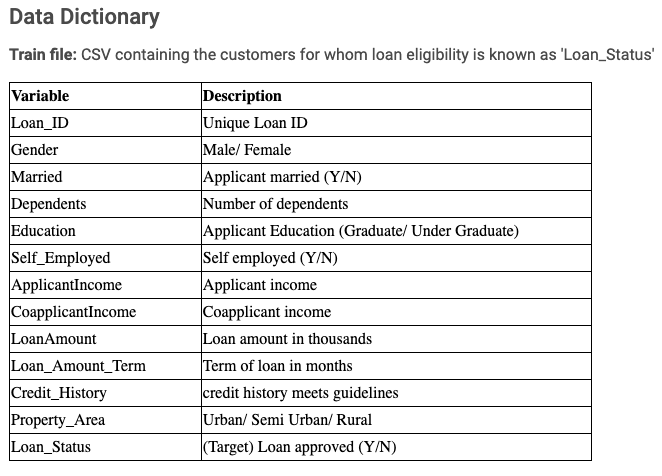

In [4]:
train = pd.read_csv("/content/drive/MyDrive/AnalyticsVidhyaLoanPrediction/train.csv")#, delimiter= '\t',encoding='UTF-16')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test = pd.read_csv("/content/drive/MyDrive/AnalyticsVidhyaLoanPrediction/test.csv")#, delimiter= '\t',encoding='UTF-16')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Missing Value Analysis

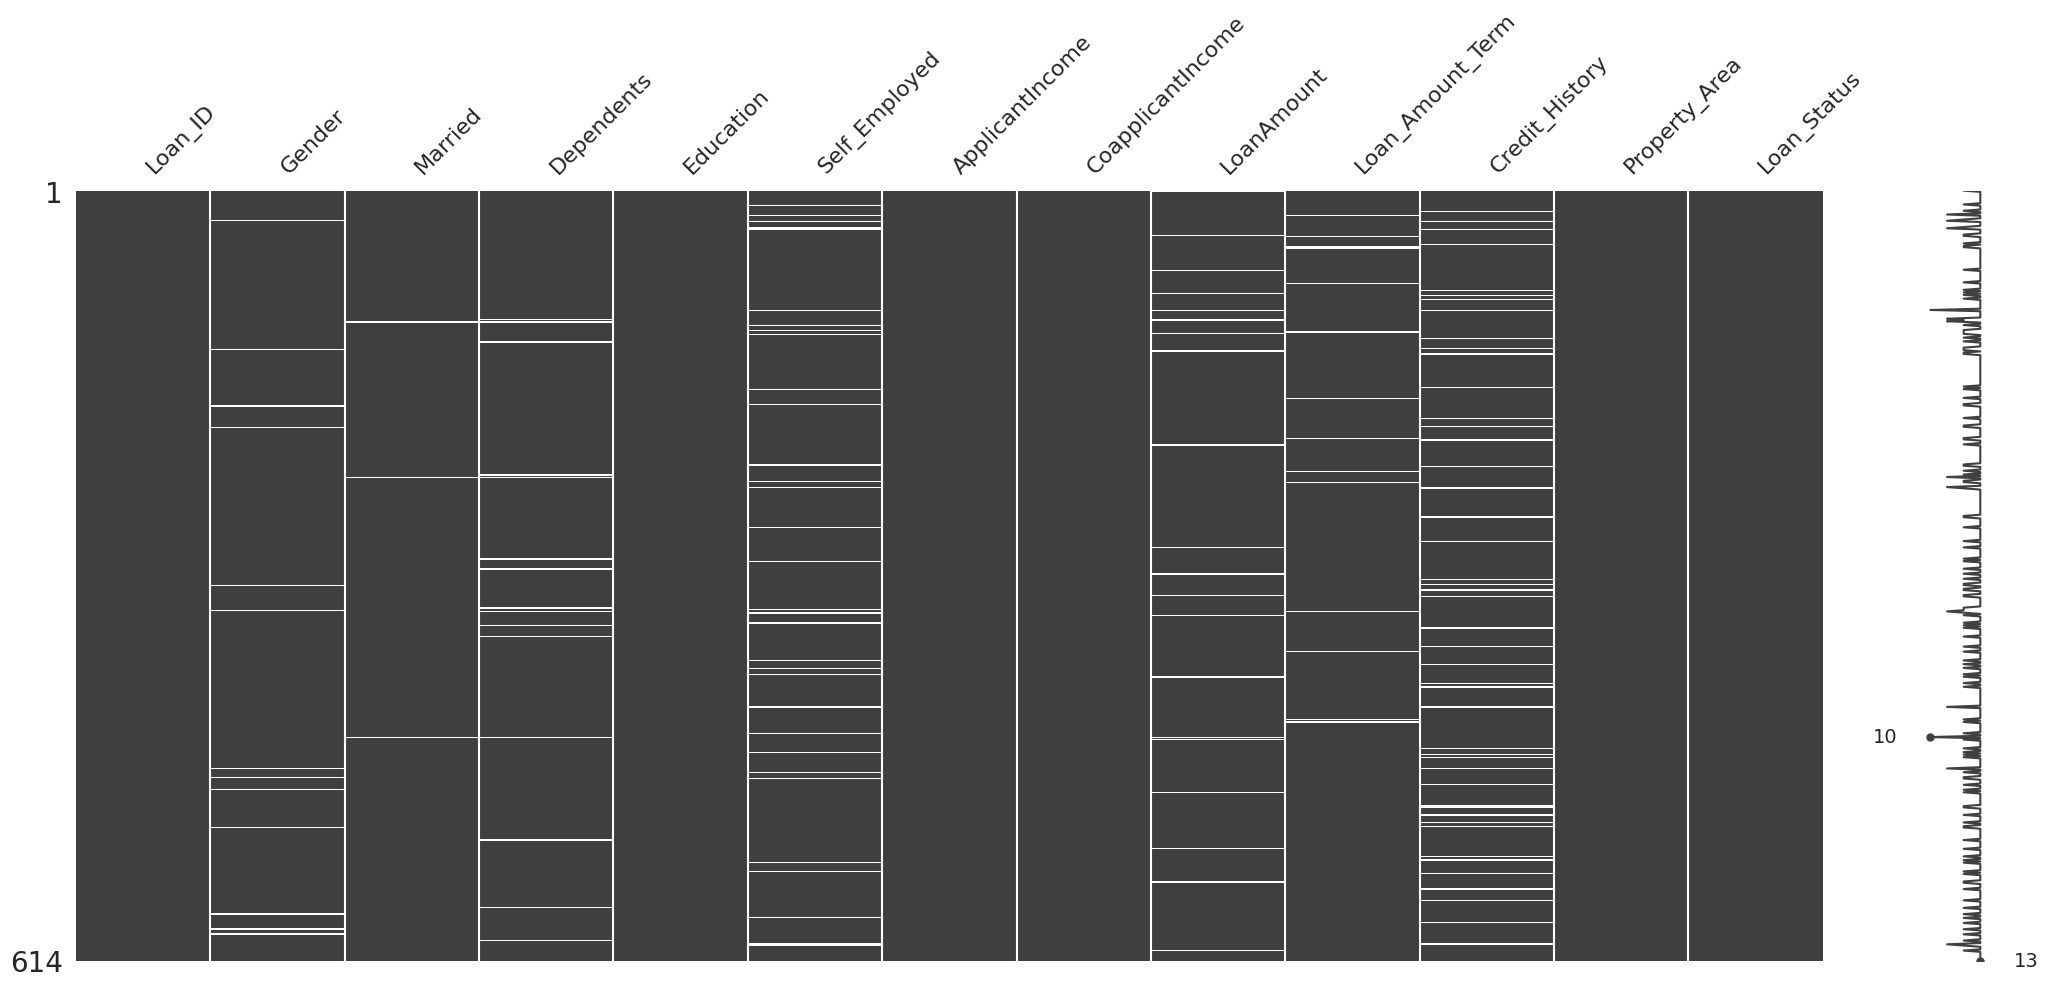

In [6]:
import missingno as msno
msno.matrix(train)
train.isna().sum().sort_values()
train2 = train.copy()

<Axes: >

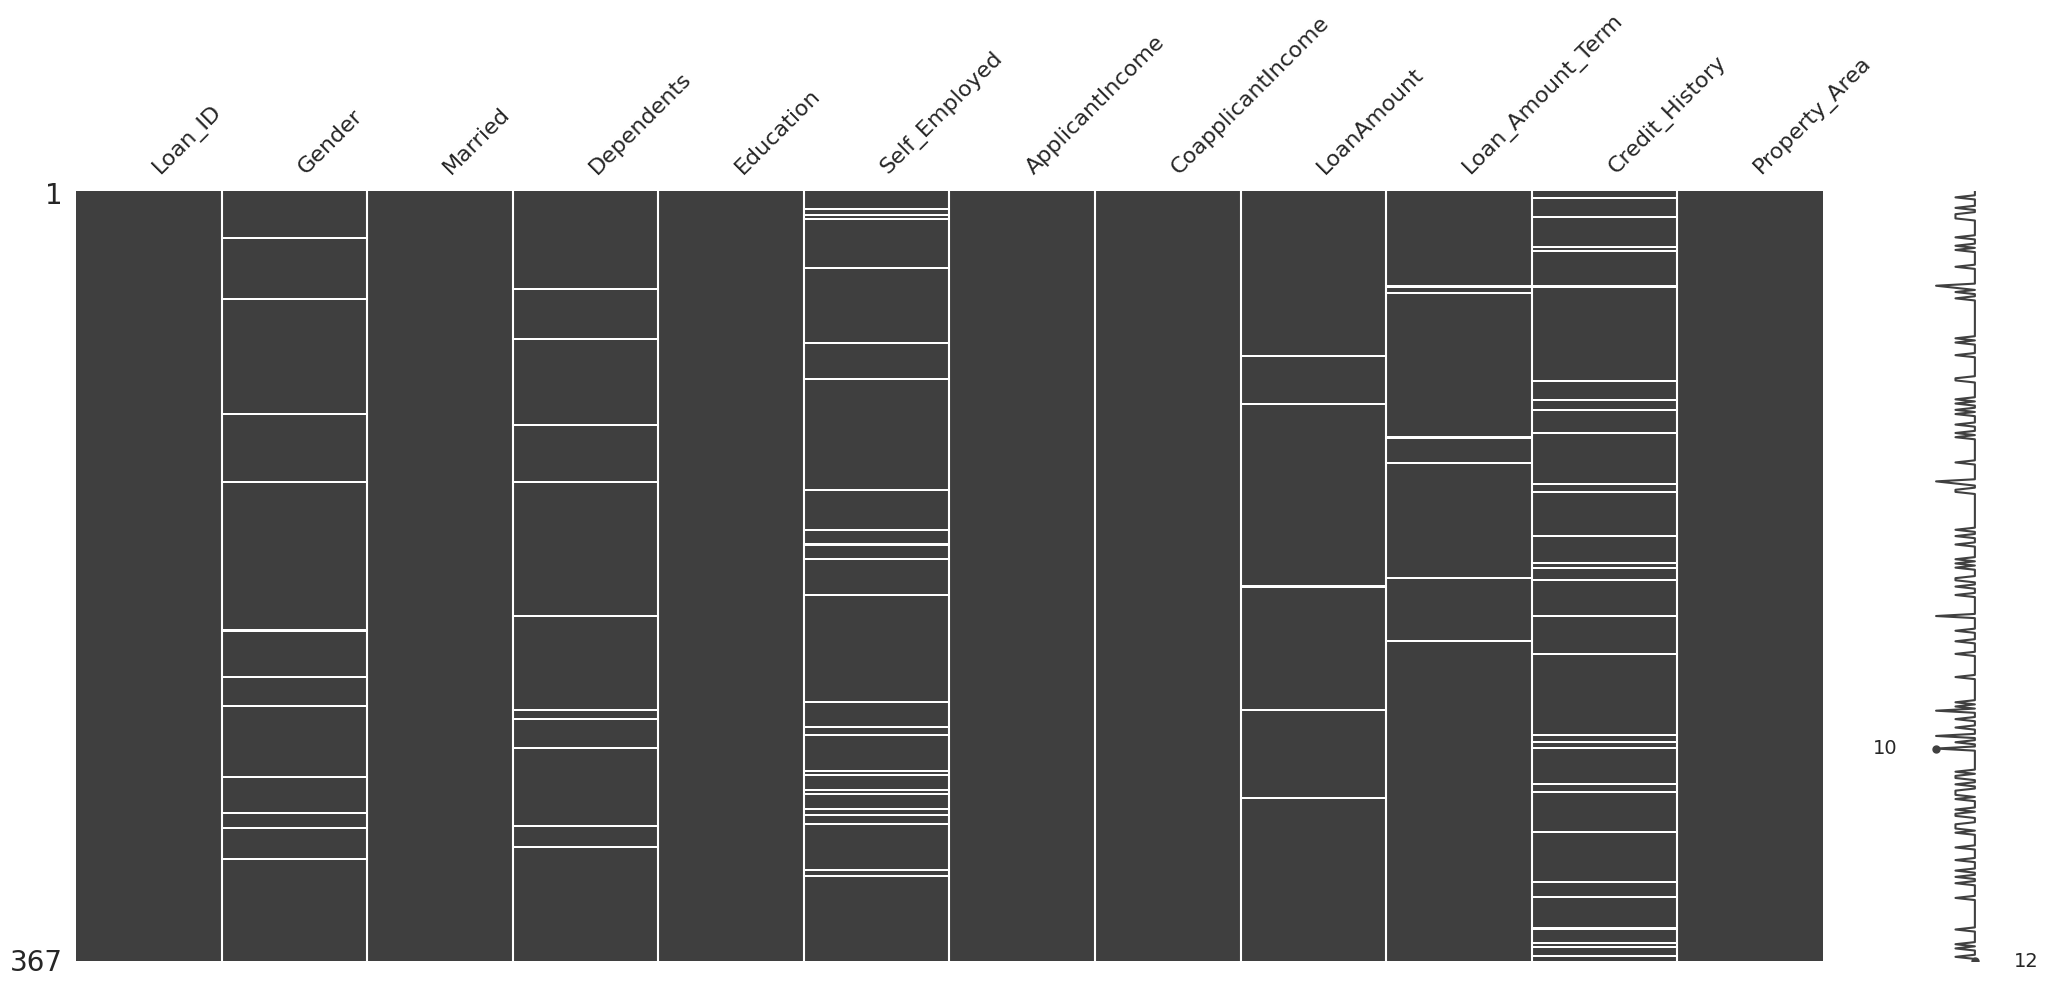

In [7]:
msno.matrix(test)

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Buscar realizar gráficos con las distribuciones de las columnas -debería dar LoanAmount con outliers

In [10]:
train["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

Imputing for Categorical Variables

In [11]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0]) #imputing missing values for gender
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])

train['Married'] = train['Married'].fillna(train['Married'].mode()[0]) #imputing missing values for married
test['Married'] = test['Married'].fillna(test['Married'].mode()[0]) 

train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0]) #imputing missing values for Dependents
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0]) 

train['Self_Employed'].fillna('No',inplace=True)
test['Self_Employed'].fillna('No',inplace=True)

train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

Imputing for Continuos Variable

In [12]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [13]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())

In [14]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

chi-square analysis (to understand the dependency between input categorical variables)

In [16]:
train.ApplicantIncome

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [17]:
df_chi = train.copy()

In [18]:
#credits to Ananya Nandi

#Assigning levels to the categories
lis = []
for i in range(0, df_chi.shape[1]):
    if(df_chi.iloc[:,i].dtypes == 'object'):
        df_chi.iloc[:,i] = pd.Categorical(df_chi.iloc[:,i])
        df_chi.iloc[:,i] = df_chi.iloc[:,i].cat.codes 
        lis.append(df_chi.columns[i])

In [19]:
df_chi

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [20]:
cat_var=["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Loan_Status"] 
catdf=df_chi[cat_var]

In [21]:
from sklearn.feature_selection import chi2
n= 7
for i in range(0,6):
    X=catdf.iloc[:,i+1:n]
    y=catdf.iloc[:,i]
    chi_scores = chi2(X,y)
    p_values = pd.Series(chi_scores[1],index = X.columns)
    print("for",i)
    print(p_values)
    for j in range (0, len(p_values)):
        if (p_values[j]<0.05):
            print(p_values[j])

for 0
Married           1.033668e-07
Dependents        5.440191e-07
Education         3.202845e-01
Self_Employed     9.903387e-01
Credit_History    9.310624e-01
Loan_Status       8.031823e-01
dtype: float64
1.0336676344223253e-07
5.440190932725145e-07
for 1
Dependents        3.535914e-22
Education         7.874868e-01
Self_Employed     9.175394e-01
Credit_History    9.178124e-01
Loan_Status       2.049573e-01
dtype: float64
3.5359141698071287e-22
for 2
Education         0.602805
Self_Employed     0.159554
Credit_History    0.955121
Loan_Status       0.804772
dtype: float64
for 3
Self_Employed     0.810728
Credit_History    0.487127
Loan_Status       0.234030
dtype: float64
for 4
Credit_History    0.988330
Loan_Status       0.959107
dtype: float64
for 5
Loan_Status    6.878727e-14
dtype: float64
6.878726741563634e-14


will drop dependents and gender as they are highly correlated with 2 other variables

In [22]:
#gender is correlated with married and dependent
train=train.drop(["Gender"],axis=1)
test=test.drop(["Gender"],axis=1)

#Loan ID is dropped because it is not required
train=train.drop(["Loan_ID"],axis=1)
test=test.drop(["Loan_ID"],axis=1)

train=train.drop(["Dependents"],axis=1)
test=test.drop(["Dependents"],axis=1)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    object 
 1   Education          614 non-null    object 
 2   Self_Employed      614 non-null    object 
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    object 
 9   Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 48.1+ KB


dummy variable for categorical variables - se reduce dimensionalidad, al realizar como titulo, el "Casado SI y teniendo como resultado True and False. Luego se quita la columan original y se la reemplaza. Asi tendremos luego 1 y 0 para las categoricals

In [24]:
df_final= pd.get_dummies(train[["Married","Education","Self_Employed","Credit_History","Property_Area"]], drop_first=True, dtype=bool)

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           614 non-null    float64
 1   Married_Yes              614 non-null    bool   
 2   Education_Not Graduate   614 non-null    bool   
 3   Self_Employed_Yes        614 non-null    bool   
 4   Property_Area_Semiurban  614 non-null    bool   
 5   Property_Area_Urban      614 non-null    bool   
dtypes: bool(5), float64(1)
memory usage: 7.9 KB


In [26]:
train=train.drop(["Married","Education","Self_Employed","Credit_History","Property_Area"],axis=1)

In [27]:
mergedDf = train.merge(df_final, left_index=True, right_index=True)

In [28]:
mergedDf["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [29]:
mergedDf["LoanAmount"].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [30]:
mergedDf["Loan_Amount_Term"].describe()

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [31]:
mergedDf["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [32]:
applicantIncomeMean = mergedDf["ApplicantIncome"].mean()
applicantIncomeStd = mergedDf["ApplicantIncome"].std()
print(applicantIncomeMean, applicantIncomeStd)

5403.459283387622 6109.041673387178


In [33]:
CoapplicantIncomeMean = mergedDf["CoapplicantIncome"].mean()
CoapplicantIncomeStd = mergedDf["CoapplicantIncome"].std()
print(CoapplicantIncomeMean, CoapplicantIncomeStd)

1621.2457980271008 2926.2483692241885


In [34]:
LoanAmountMean = mergedDf["LoanAmount"].mean()
LoanAmountStd = mergedDf["LoanAmount"].std()
print(LoanAmountMean, LoanAmountStd)

145.75244299674267 84.10723338042614


In [35]:
Loan_Amount_Term_Mean = mergedDf["Loan_Amount_Term"].mean()
Loan_Amount_Term_Std = mergedDf["Loan_Amount_Term"].std()
print(Loan_Amount_Term_Mean, Loan_Amount_Term_Std)

342.4104234527687 64.42862906767307


In [36]:
mergedDf.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,Y,1.0,False,False,False,False,True
1,4583,1508.0,128.0,360.0,N,1.0,True,False,False,False,False
2,3000,0.0,66.0,360.0,Y,1.0,True,False,True,False,True
3,2583,2358.0,120.0,360.0,Y,1.0,True,True,False,False,True
4,6000,0.0,141.0,360.0,Y,1.0,False,False,False,False,True


### Visualización de algunas variables

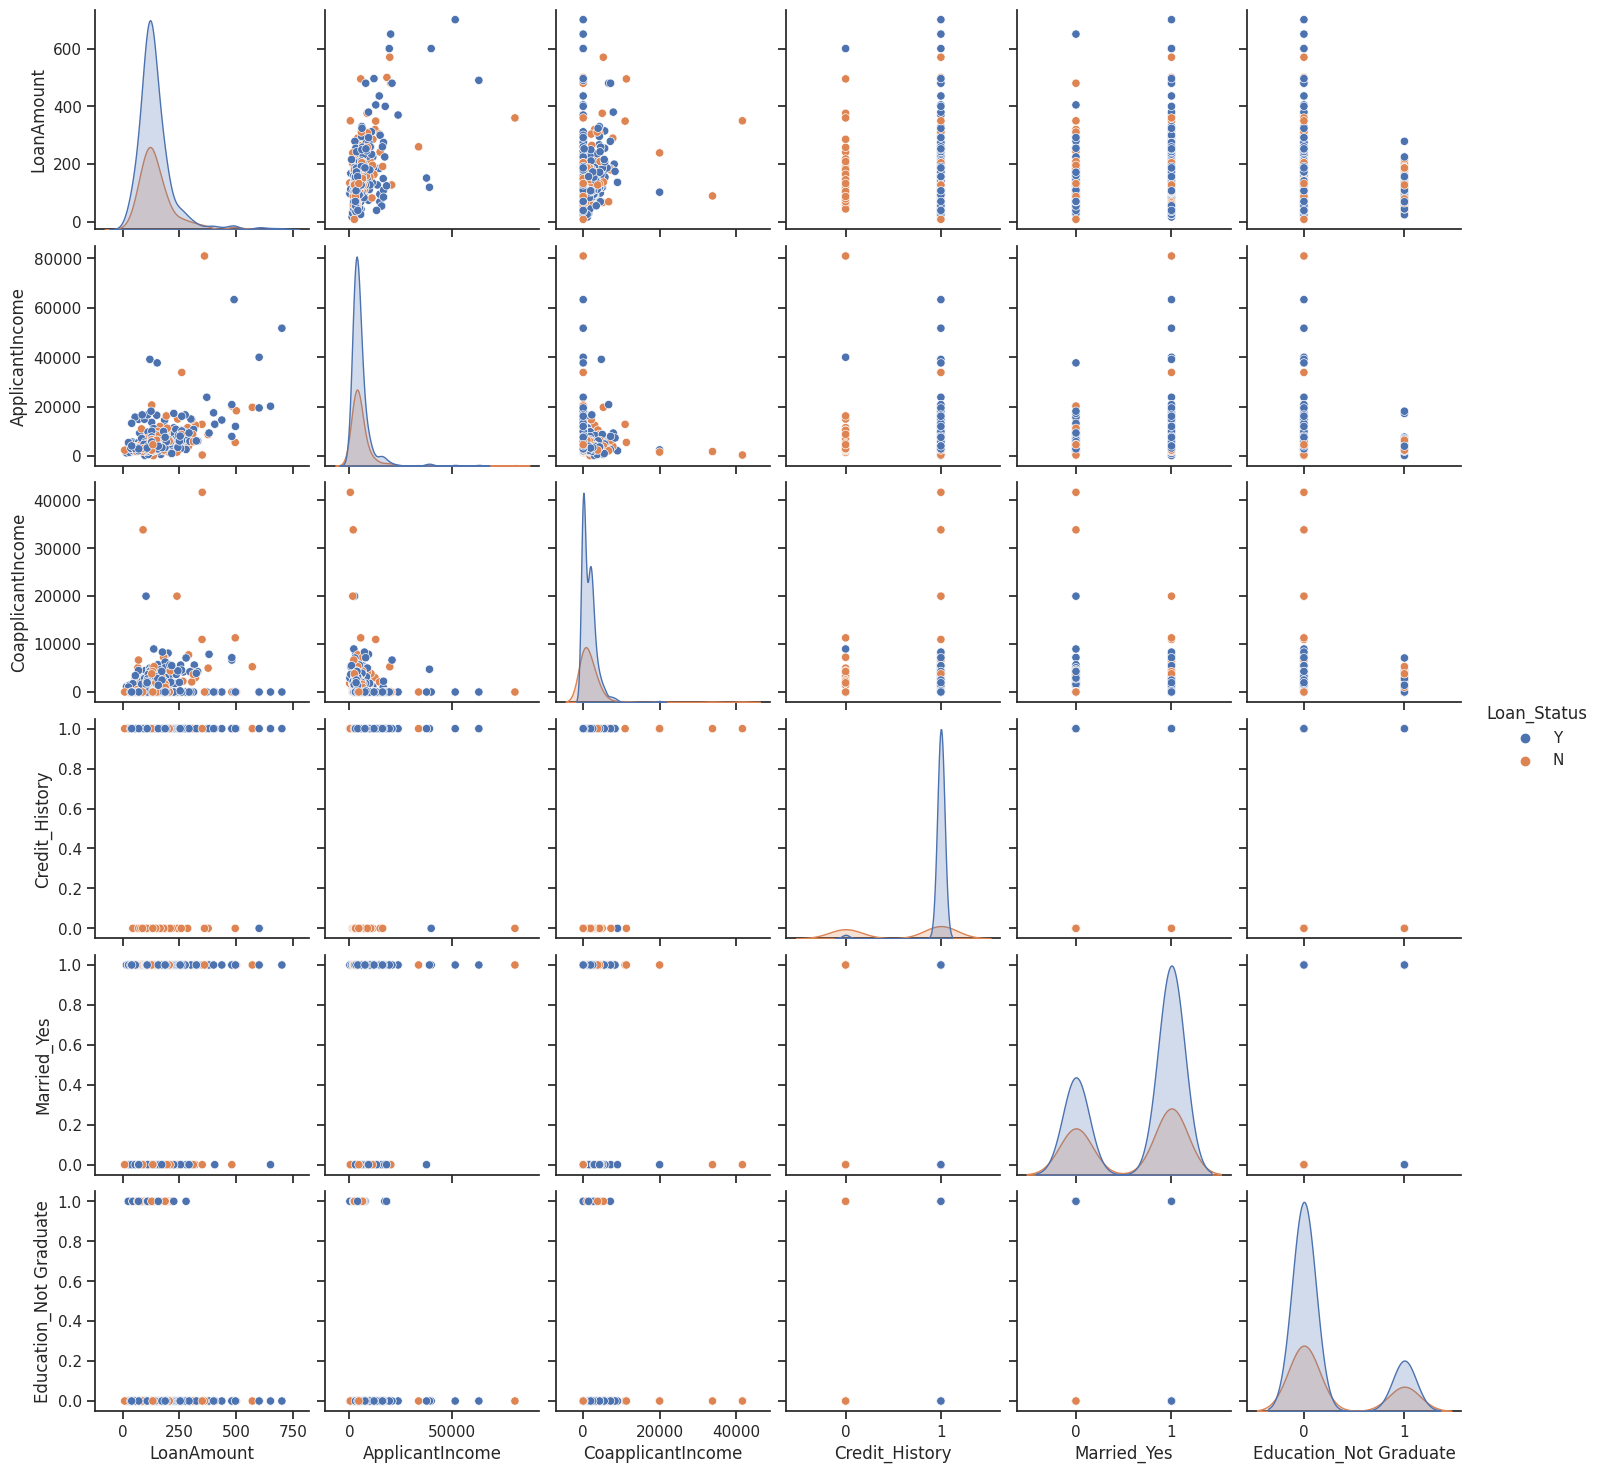

In [37]:
import seaborn as sns

cols_to_plot = ["LoanAmount", "ApplicantIncome", "CoapplicantIncome", "Credit_History", "Loan_Status", "Married_Yes","Education_Not Graduate" ]
sns.set_theme(style="ticks")
sns.pairplot(mergedDf[cols_to_plot], hue="Loan_Status")

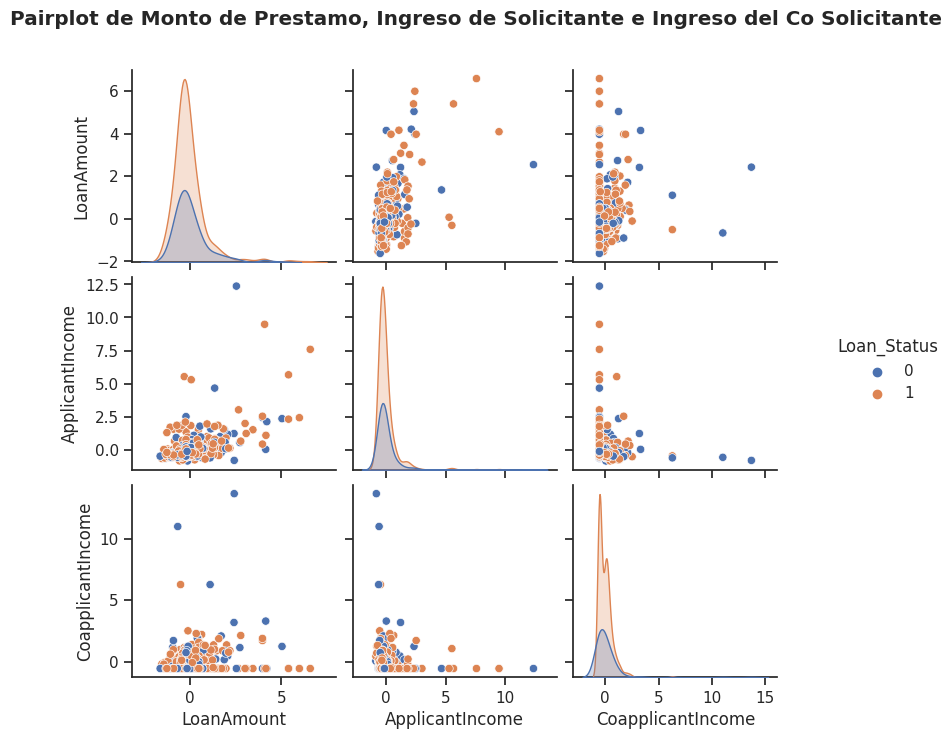

In [48]:
import seaborn as sns

cols_to_plot = ["LoanAmount", "ApplicantIncome", "CoapplicantIncome", "Loan_Status"]
sns.set_theme(style="ticks")

a = sns.pairplot(mergedDf[cols_to_plot], hue="Loan_Status")
a.fig.suptitle("Pairplot de Monto de Prestamo, Ingreso de Solicitante e Ingreso del Co Solicitante", fontweight='bold')
a.fig.subplots_adjust(top=0.90)

In [39]:
#Standardizing the numerical variables
mergedDf["ApplicantIncome"]= (mergedDf["ApplicantIncome"] - mergedDf["ApplicantIncome"].mean())/mergedDf["ApplicantIncome"].std()
mergedDf["CoapplicantIncome"]= (mergedDf["CoapplicantIncome"] - mergedDf["CoapplicantIncome"].mean())/mergedDf["CoapplicantIncome"].std()
mergedDf["LoanAmount"]= (mergedDf["LoanAmount"] - mergedDf["LoanAmount"].mean())/mergedDf["LoanAmount"].std()
mergedDf["Loan_Amount_Term"]= (mergedDf["Loan_Amount_Term"] - mergedDf["Loan_Amount_Term"].mean())/mergedDf["Loan_Amount_Term"].std()

In [40]:
#que hace este script??

lis = []
for i in range(0, mergedDf.shape[1]):
    if(mergedDf.iloc[:,i].dtypes == 'object'):
        mergedDf.iloc[:,i] = pd.Categorical(mergedDf.iloc[:,i])
        mergedDf.iloc[:,i] = mergedDf.iloc[:,i].cat.codes 
        lis.append(mergedDf.columns[i])

Preparing target and feature variables

In [ ]:
X=mergedDf.drop(["Loan_Status"],axis=1)
Y=mergedDf["Loan_Status"]
Y=Y.astype(int)
x=np.array(X)
y=np.array(Y)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

Checking for the f1 scores for Naive Bayes

In [ ]:
#Naive Bayes
parameters = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6],[0.45,0.55],[0.5,0.5],[0.55,0.45],[0.6,0.4]]}
nb = GridSearchCV(GaussianNB(), parameters, scoring = 'f1', n_jobs=-1)
nb.fit(x, y)
scores = cross_val_score(nb, x, y, cv=5,scoring = 'f1')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Checking for the f1 scores for Decision Trees

In [ ]:
from sklearn import tree
from sklearn.pipeline import Pipeline
decisiontree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('decisiontree', decisiontree)])
criterion = ['gini', 'entropy']
max_depth = list(range(1,20))
parameters = dict(decisiontree__criterion=criterion,decisiontree__max_depth=max_depth)
dt = GridSearchCV(pipe, parameters,cv=5,scoring="f1", n_jobs=-1)
dt.fit(x,y)
scores = cross_val_score(dt, x, y,scoring="f1", cv=5)
print("DT Cross validation f1 score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Extraigo los parametros del mejor modelo arrojando por el CVGridSeach

In [ ]:
dt.best_estimator_

In [ ]:
dt.best_params_

In [ ]:
dtfinal = tree.DecisionTreeClassifier(max_depth=1, criterion="gini")

In [ ]:
dtfinal.fit(x,y)

In [ ]:
scores = cross_val_score(dtfinal, x, y,scoring="f1", cv=5)

In [ ]:
print("DT Cross validation f1 score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Prueba de Prediccion

In [ ]:
uno = x[6]
dos = x[7]
tres = x[8]

In [ ]:
uno

In [ ]:
a = dtfinal.predict([uno])
b = dtfinal.predict([dos])
c = dtfinal.predict([tres])

In [ ]:
print(a, b, c)

Checking for the f1 scores for knn

In [ ]:
number_of_neighbors = range(1,20)
params = {'n_neighbors':number_of_neighbors}
knn = KNeighborsClassifier()
knnmodel = GridSearchCV(knn, params, cv=5,scoring="f1", n_jobs=-1)
knnmodel.fit(x,y)
scores = cross_val_score(knnmodel, x, y,scoring="f1", cv=5)
print("KNN Cross validation f1 score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

working on the test data

In [ ]:
df_cat= pd.get_dummies(test[["Married","Education","Self_Employed","Credit_History","Property_Area"]], drop_first=True, dtype=bool)

In [ ]:
test=test.drop(["Married","Education","Self_Employed","Credit_History","Property_Area"],axis=1)

In [ ]:
finaldDf = test.merge(df_cat, left_index=True, right_index=True)

In [ ]:
finaldDf['Loan_Amount_Term']=finaldDf['Loan_Amount_Term'].astype(int)

In [ ]:
finaldDf["ApplicantIncome"]= (finaldDf["ApplicantIncome"] - finaldDf["ApplicantIncome"].mean())/finaldDf["ApplicantIncome"].std()
finaldDf["CoapplicantIncome"]= (finaldDf["CoapplicantIncome"] - finaldDf["CoapplicantIncome"].mean())/finaldDf["CoapplicantIncome"].std()
finaldDf["LoanAmount"]= (finaldDf["LoanAmount"] - finaldDf["LoanAmount"].mean())/finaldDf["LoanAmount"].std()
finaldDf["Loan_Amount_Term"]= (finaldDf["Loan_Amount_Term"] - finaldDf["Loan_Amount_Term"].mean())/finaldDf["Loan_Amount_Term"].std()

In [ ]:
x=np.array(finaldDf)

In [ ]:
#Prediction for ouput variable
ypred=dtfinal.predict(x)

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/AnalyticsVidhyaLoanPrediction/test.csv")
test["Loan_Status"]=ypred

In [ ]:
submission = pd.DataFrame()
submission["Loan_ID"] = test["Loan_ID"]
submission["Loan_Status"] = test["Loan_Status"]
submission.replace(1,"Y", inplace=True)
submission.replace(0,"N", inplace=True)
submission.head()

In [ ]:
submission.to_csv("/content/drive/MyDrive/AnalyticsVidhyaLoanPrediction/ThirdSubmission.csv", index=False)

## Joblib

In [ ]:
import joblib
joblib.dump(dtfinal, '/content/drive/MyDrive/AnalyticsVidhyaLoanPrediction/modelo_entrenado.joblib')
model_from_joblib = joblib.load('/content/drive/MyDrive/AnalyticsVidhyaLoanPrediction/modelo_entrenado.joblib')

In [ ]:
model_from_joblib.predict(uno.reshape(1,-1))
model_from_joblib.predict(dos.reshape(1,-1))
model_from_joblib.predict(tres.reshape(1,-1))